<a href="https://colab.research.google.com/github/yrodriguezmd/Fastai_Deep_Learning/blob/main/Kaggle_birds_blog_2021_7_4_9am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
#!pip install fastai -U
import fastai
from fastai.vision.all import *

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marialrodriguez","key":"67bff63204041ef9d3745b23eba93a53"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-01 09:24:52          10173  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6214  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2310  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2553  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
# if competition:  !kaggle competitions download 'author/set name'

In [ ]:
!kaggle datasets download 'gpiosenka/100-bird-species/train'

 99% 1.78G/1.81G [00:14<00:00, 150MB/s]
100% 1.81G/1.81G [00:14<00:00, 136MB/s]


In [ ]:
!unzip \*zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: birds_rev2/train/TOWNSENDS WARBLER/091.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/092.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/093.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/094.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/095.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/096.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/097.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/098.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/099.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/100.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/101.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/102.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/103.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/104.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/105.jpg  
  inflating: birds_rev2/train/TOWNSENDS WARBLER/106.jpg  
  inflating: birds_re

In [ ]:
train_path = 'birds_rev2/train'
# no need to create df
# enough data in train

In [ ]:
# if in kaggle
#train_path = Path('../input/100-bird-species/train')

In [ ]:
#baseline
dblock = DataBlock(
    (ImageBlock(), CategoryBlock()),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(seed=42),
    item_tfms = Resize(460),
    batch_tfms = aug_transforms(size=224)
)
dls = dblock.dataloaders(train_path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


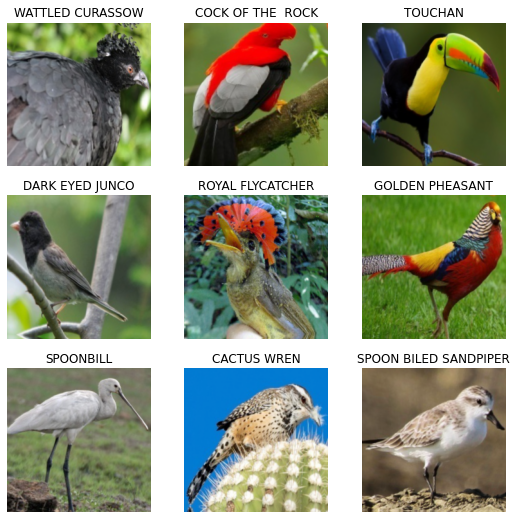

In [ ]:
dls.train.show_batch()

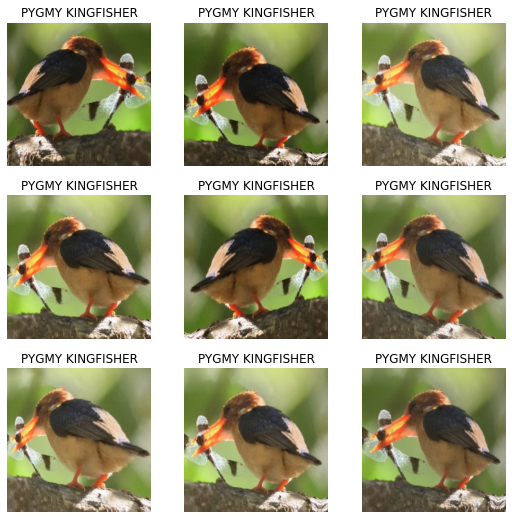

In [ ]:
dls.train.show_batch(unique=True)

In [ ]:
#yeesss!

In [ ]:
# baseline, non-pretrained
model = xresnet50(n_out = dls.c)
learn_base = Learner(dls, model, loss_func = CrossEntropyLossFlat(),
                     metrics = accuracy)
learn_base.fit_one_cycle(5, 3e-3)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


SuggestedLRs(valley=0.00015848931798245758)

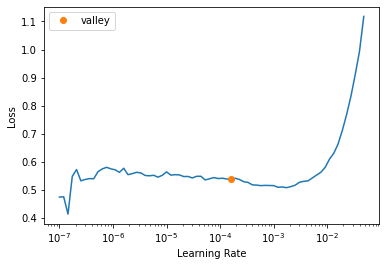

In [ ]:
learn_base.lr_find()
# keep 3e-3

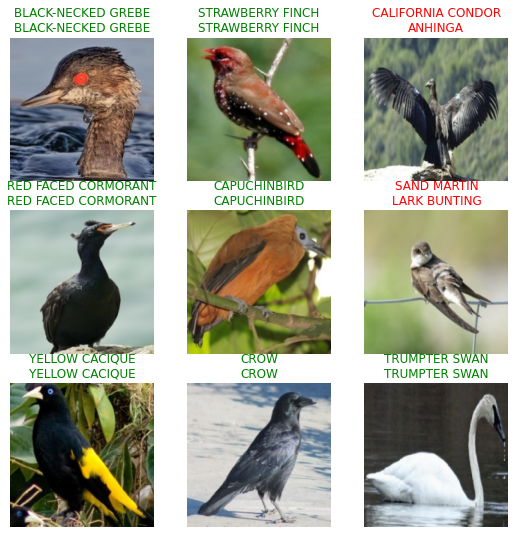

In [ ]:
learn_base.show_results()

In [ ]:
# normalization
x, y = dls.one_batch()
print(x.shape)
print(y.shape)

torch.Size([64, 3, 224, 224])
torch.Size([64])


In [ ]:
# normalization
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = [*aug_transforms(size=224),
                    Normalize.from_stats(*imagenet_stats)])
dls_norm = dblock.dataloaders(train_path, bs=64)

In [ ]:
xn, yn = dls_norm.one_batch()
print(xn.shape)
print(yn.shape)

torch.Size([64, 3, 224, 224])
torch.Size([64])


In [ ]:
print('Non-normalized tensors:', x[0][0][0][:10])
print('Mean:',x.mean(dim = [0,2,3]))
print('Std:', x.std(dim = [0,2,3]))

print('\nNormalized tensors:', xn[0][0][0][:10])
print('Mean:',xn.mean(dim = [0,2,3]))
print('Std:', xn.std(dim = [0,2,3]))

Non-normalized tensors: TensorImage([0.1650, 0.1606, 0.1610, 0.1602, 0.1566, 0.1496, 0.1484, 0.1467, 0.1442, 0.1528], device='cuda:0')
Mean: TensorImage([0.4800, 0.4706, 0.3967], device='cuda:0')
Std: TensorImage([0.2422, 0.2342, 0.2495], device='cuda:0')

Normalized tensors: TensorImage([-0.3030, -0.8117, -1.2016, -1.2505, -1.2315, -1.2326, -1.2363, -1.2035, -1.1688, -1.1498], device='cuda:0')
Mean: TensorImage([-0.0535,  0.0806, -0.0486], device='cuda:0')
Std: TensorImage([1.0489, 1.0722, 1.1637], device='cuda:0')


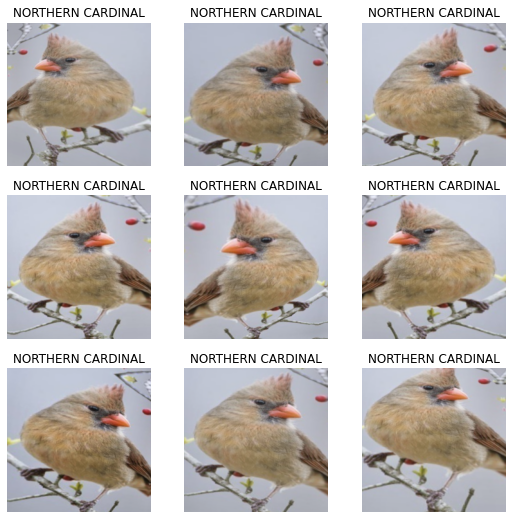

In [ ]:
dls_norm.train.show_batch(unique=True)

In [ ]:
model = xresnet50(n_out = dls_norm.c)
learn_norm = Learner(dls_norm, model, loss_func = CrossEntropyLossFlat(),
                metrics = accuracy)
learn_norm.fit_one_cycle(5, 3e-3) #maintained lr for now
# fine_tune has default norm
# results not improved by normalization, prob because specimens are
#    relatively similar

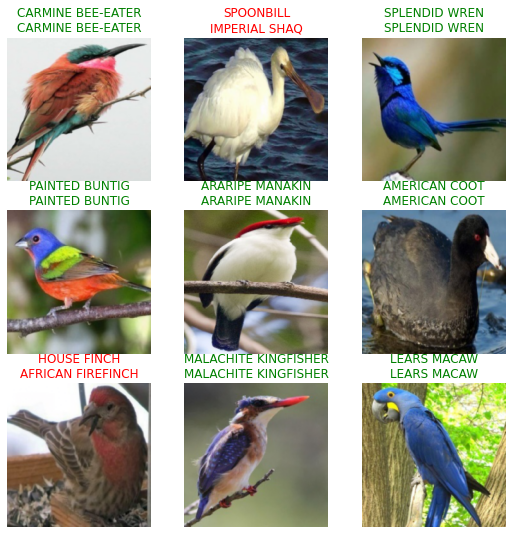

In [ ]:
learn_norm.show_results()

In [ ]:
# progressive re-sizing

In [ ]:
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=128)) # start small
dls_128 = dblock.dataloaders(train_path, bs=64)

In [ ]:
model = xresnet50(n_out = dls_128.c)
learn_128 = Learner(dls_128, model,
                    loss_func = CrossEntropyLossFlat(),
                    metrics = accuracy)
learn_128.fit_one_cycle(2, 3e-3)
# faster

In [ ]:
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=224)) # bigger
dls_224 = dblock.dataloaders(train_path, bs=64)

In [ ]:
# changing the dls of the previous learner
learn_128.dls = dls_224
learn_128.fit_one_cycle(3, 3e-3)

In [ ]:
# TTA
# using original dblock and dls
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=224))
dls = dblock.dataloaders(train_path, bs=64)

In [ ]:
model = xresnet50(n_out = dls.c)
learn = Learner(dls, model,
                loss_func = CrossEntropyLossFlat(),
                metrics = accuracy)

learn.fit_one_cycle(5, 3e-3) 

In [ ]:
preds, targs = learn.tta()

In [ ]:
accuracy(preds, targs).item()

0.8277438879013062

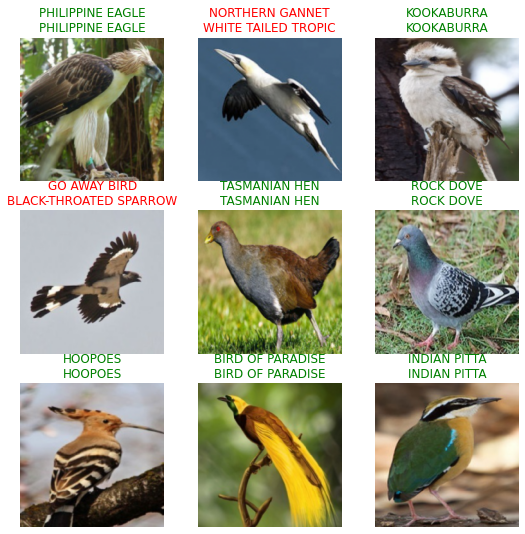

In [ ]:
learn.show_results()

In [ ]:
### review results prior to run

In [ ]:
# choosing resizing ways
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=128)) 
dls_128 = dblock.dataloaders(train_path, bs=64)

In [ ]:
model = xresnet50(n_out = dls_128.c)
learn_ = Learner(dls_128, model,
                    loss_func = CrossEntropyLossFlat(),
                    metrics = accuracy)
learn_.fit_one_cycle(2, 3e-3) 

In [ ]:
# next size
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=224)) 
dls_224 = dblock.dataloaders(train_path, bs=64)

In [ ]:
# changing the dls of the previous learner
learn_.dls = dls_224
learn_.fine_tune(3, 3e-3) # changed to fine_tune, now has norm

In [ ]:
preds, targs = learn_.tta()
accuracy(preds, targs).item()

0.8493394255638123

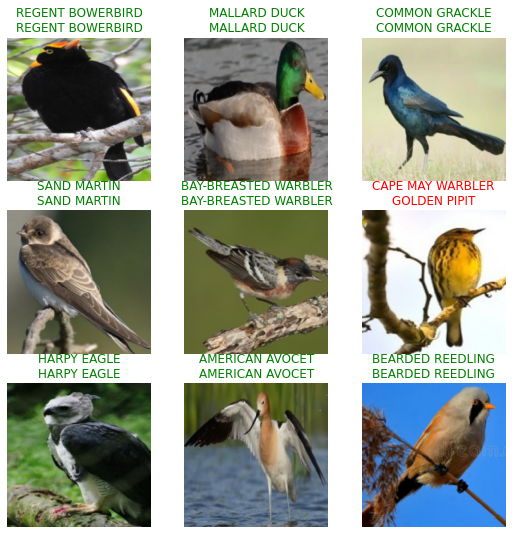

In [ ]:
learn_.show_results()

In [ ]:
interp = ClassificationInterpretation.from_learner(learn_)

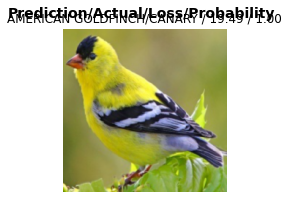

In [ ]:
interp.plot_top_losses(1)
# both small birds, mostly yellow

In [ ]:
interp.most_confused(min_val = 5)

[('WHITE CHEEKED TURACO', 'GUINEA TURACO', 8),
 ('WHITE NECKED RAVEN', 'CROW', 8),
 ('GILDED FLICKER', 'NORTHERN FLICKER', 7),
 ('CRESTED NUTHATCH', 'TIT MOUSE', 5),
 ('RUBY THROATED HUMMINGBIRD', 'ANNAS HUMMINGBIRD', 5)]

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn_.predict(img) # rev
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn_.predict(img) #rev
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select the bird you want to identify!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
learn_.export()

path = Path()
path.ls(file_exts = '.pkl')

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
#using learn_
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn_.predict(img) # rev
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn_.predict(img) #rev
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select the bird you want to identify!'),
      btn_upload, btn_run, out_pl, lbl_pred])

RuntimeError: ignored

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select the bird you want to identify!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
# for final model:
# use lr 1e-4
# prog sizing fit 1 cycle, then fine tune
# normalization in fine tune
# tta?

In [ ]:
## try no n_out

In [ ]:
model_nout = xresnet50()
learn_nout = Learner(dls_128, model,
                    loss_func = CrossEntropyLossFlat(),
                    metrics = accuracy)
learn_nout.fit_one_cycle(5, 3e-3) 
# higher acc prob because superimposed with previous

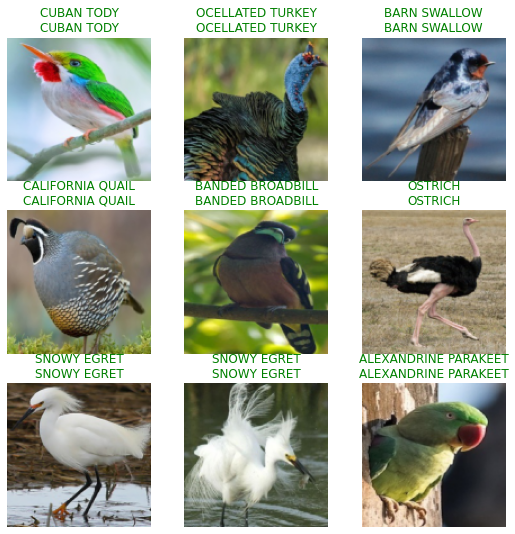

In [ ]:
learn_nout.show_results()

In [ ]:
## using n_out default
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=128)) 
dls_128 = dblock.dataloaders(train_path, bs=64)

In [ ]:
# using n_out default
model = xresnet50()
learn_nout = Learner(dls_128, model,
                    loss_func = CrossEntropyLossFlat(),
                    metrics = accuracy)
learn_nout.fit_one_cycle(2, 3e-3) 

In [ ]:
# using nout default
# next size
dblock = DataBlock(
      (ImageBlock, CategoryBlock),
      get_items = get_image_files,
      get_y = parent_label,
      item_tfms = Resize(460),
      batch_tfms = aug_transforms(size=224)) 
dls_224 = dblock.dataloaders(train_path, bs=64)

In [ ]:
# using nout default
# changing the dls of the previous learner
learn_nout.dls = dls_224
learn_nout.fine_tune(3, 3e-3) # changed to fine_tune, now has norm

In [ ]:
# using nout default
preds, targs = learn_nout.tta()
accuracy(preds, targs).item()

0.847942054271698

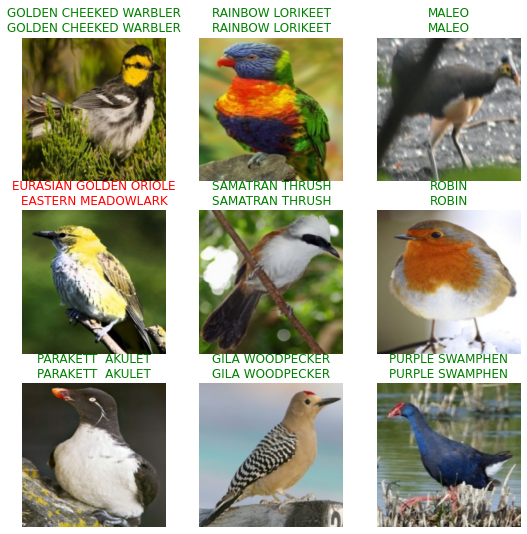

In [ ]:
learn_nout.show_results()

In [ ]:
#using nout default
interp = ClassificationInterpretation.from_learner(learn_nout)

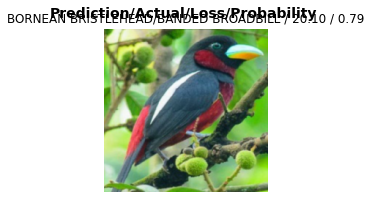

In [ ]:
#using nout default
interp.plot_top_losses(1)

In [ ]:
#using nout default
interp.most_confused(min_val = 5)

[('GUINEA TURACO', 'WHITE CHEEKED TURACO', 8),
 ('GILDED FLICKER', 'NORTHERN FLICKER', 7),
 ('GOLDEN CHLOROPHONIA', 'BORNEAN LEAFBIRD', 7),
 ('GUINEAFOWL', 'VULTURINE GUINEAFOWL', 7),
 ('HARPY EAGLE', 'SHOEBILL', 6),
 ('PURPLE FINCH', 'HOUSE FINCH', 6),
 ('BLACK VULTURE', 'WHITE NECKED RAVEN', 5),
 ('CALIFORNIA QUAIL', 'GAMBELS QUAIL', 5),
 ('CROWNED PIGEON', 'VICTORIA CROWNED PIGEON', 5),
 ('NORTHERN GANNET', 'TRUMPTER SWAN', 5)]

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select the bird you want to identify!'),
      btn_upload, btn_run, out_pl, lbl_pred])

RuntimeError: ignored

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select the bird you want to identify!'),
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(250))
pred, pred_idx, probs = learn.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run = widgets.Button(description = 'Classify')
btn_run

def on_click_classify(change):
  img= PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl: display(img.to_thumb(200))
  pred, pred_idx, probs = learn.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:0.4f}'

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()

from ipywidgets import *
VBox([widgets.Label('Select the bird you want to identify!'),
      btn_upload, btn_run, out_pl, lbl_pred])